In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from multi_mems import *

### Load Example Trajectories

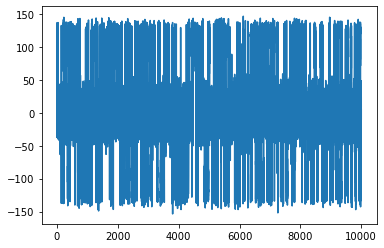

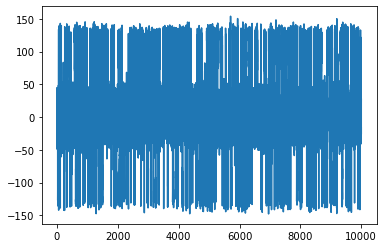

In [2]:
theta = np.load('theta.npy')
phi = np.load('phi.npy')
dt = 0.002

t =np.arange(0,len(theta)*dt,dt)
plt.plot(t,theta)
plt.show()

plt.plot(t,phi)
plt.show()

### First Do The 1D Case

In [3]:
xf1=xframe(theta,t,fix_time=True)
xvaf=compute_va(xf1,correct_jumps=True)
xvaf1 = xvaf.copy()
xvaf.columns = ['t_1', 'x_1', 'v_1', 'a_1']
xvaf.head()

,t_1,x_1,v_1,a_1
#t,,,,
0.002,0.002,9.516,316.50,-1000.0
0.004,0.004,10.147,313.25,-2250.0
0.006,0.006,10.769,308.50,-2500.0
0.008,0.008,11.381,303.50,-2500.0
0.010,0.010,11.983,297.50,-3500.0


In [4]:
mm = multi_dim_gle(trunc = 10, bins = 200, kT =2.494, free_energy = True,physical = True,diagonal_mass = False)
t_corr, v_corr_matrix,xU_corr_matrix,force_funcs = mm.compute_correlations_G(xvaf)

dimension of system: 1
found dt = 0.002
calculate all correlation functions...


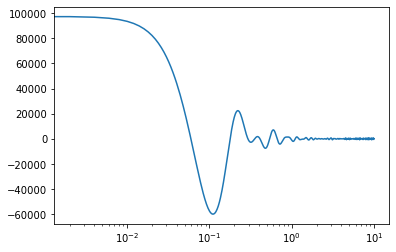

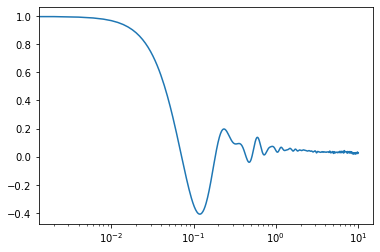

In [5]:
plt.plot(t_corr,v_corr_matrix.T[0][0])
plt.xscale('log')
plt.show()

plt.plot(t_corr,xU_corr_matrix.T[0][0])
plt.xscale('log')

used kT
2.494
constant mass matrix:
[[2.56142028e-05]]
extract memory kernel entries ...
plot kernel entries...


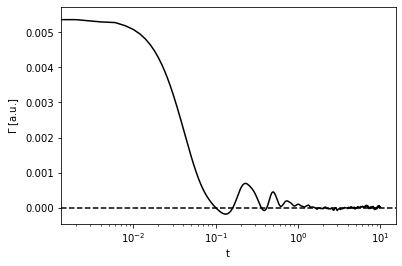

In [6]:
t_kernel, ikernel_matrix, kernel_matrix= mm.compute_kernel_mat_G(v_corr_matrix,xU_corr_matrix,first_kind = True, plot = True, d  = 0)

### Do the 2D case

In [7]:
#create x-v-a Dataframes for every trajectory

xf1=xframe(theta,t,fix_time=True)
xvaf1=compute_va(xf1,correct_jumps=True)

xf2=xframe(phi,t,fix_time=True)
xvaf2=compute_va(xf2,correct_jumps=True)

#create concatenated dataframe
xvaf = xvaf1.join(xvaf2, how='outer', lsuffix='_1', rsuffix='_2')
xvaf.head()

,t_1,x_1,v_1,a_1,t_2,x_2,v_2,a_2
#t,,,,,,,,
0.002,0.002,9.516,316.50,-1000.0,0.002,-5.347,416.00,2500.0
0.004,0.004,10.147,313.25,-2250.0,0.004,-4.510,421.00,2500.0
0.006,0.006,10.769,308.50,-2500.0,0.006,-3.663,424.50,1000.0
0.008,0.008,11.381,303.50,-2500.0,0.008,-2.812,426.50,1000.0
0.010,0.010,11.983,297.50,-3500.0,0.010,-1.957,427.75,250.0


In [8]:
mm = multi_dim_gle(trunc = 10, bins = 200, kT =2.494, free_energy = 'MV',physical = True,diagonal_mass = False)
t_corr, v_corr_matrix,xU_corr_matrix,force_funcs = mm.compute_correlations_G(xvaf)

dimension of system: 2
found dt = 0.002
calculate all correlation functions...
calculate multi-variate free energy landscape


/home/hendrykn123/.local/lib/python3.9/site-packages/multi_mems/multi_dim_gle.py:260: RuntimeWarning: divide by zero encountered in log
  fe=-np.log(hist)


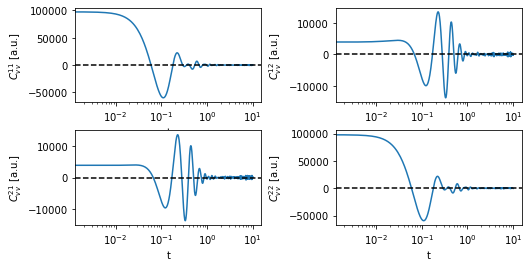

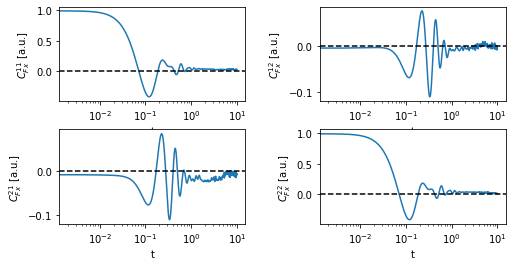

In [9]:
fig, ax = plt.subplots(2,2, figsize=(8,4))
plt.subplots_adjust(wspace = 0.4)
plt.subplots_adjust(hspace = 0.3)
for i in range(0,2):
    for j in range(0, 2): 
        ax[i][j].plot(t_corr[:-1],v_corr_matrix.T[i][j][:-1])
        ax[i][j].set_xscale('log')
        ax[i][j].set_ylabel(r'$C_{vv}^{%s%s}$ [a.u.]' % (i+1, j+1))
        ax[i][j].set_xlabel('t')

        ax[i][j].axhline(y = 0, linestyle = '--', color = 'k')

plt.show()

fig, ax = plt.subplots(2,2, figsize=(8,4))
plt.subplots_adjust(wspace = 0.4)
plt.subplots_adjust(hspace = 0.3)
for i in range(0,2):
    for j in range(0, 2): 
        ax[i][j].plot(t_corr[:-1],xU_corr_matrix.T[i][j][:-1])
        ax[i][j].set_xscale('log')
        ax[i][j].set_ylabel(r'$C_{Fx}^{%s%s}$ [a.u.]' % (i+1, j+1))
        ax[i][j].set_xlabel('t')

        ax[i][j].axhline(y = 0, linestyle = '--', color = 'k')

plt.show()

used kT
2.494
constant mass matrix:
[[ 2.56548257e-05 -1.01722356e-06]
 [-1.01722356e-06  2.54719272e-05]]
extract memory kernel entries ...
plot kernel entries...


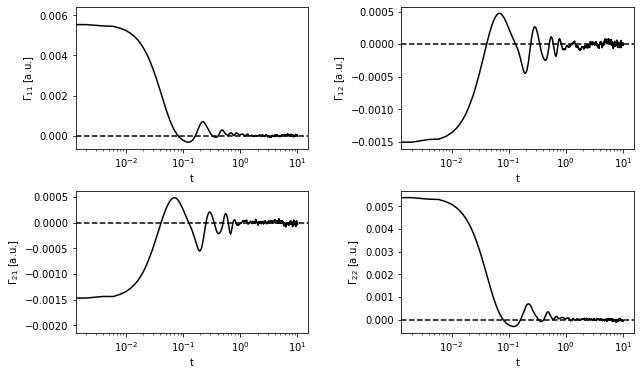

In [10]:
t, ikernel_matrix, kernel_matrix= mm.compute_kernel_mat_G(v_corr_matrix,xU_corr_matrix,first_kind = True, plot = True, d  = 0)